In [2]:
import pandas as pd
import ray.tune as tune
#Conv1D_hyperparameter = pd.read_csv("/data/remote/hyperparams_conv1d_v2/hyperparams.csv/hyperparams_conv1d.csv").set_index("dataset")
#Conv1D_hyperparameter.to_csv("../config/hyperparameter/Conv1D.csv")

#!cp /data/remote/hyperparams_conv1d_v2/hyperparams.csv/hyperparams_conv1d.csv ../config/hyperparameter/Conv1D.csv

In [3]:
best = tune.Analysis("/data/early_rnn/tune/Conv1D/Adiac").dataframe().sort_values(by="score", ascending=False).iloc[:5]

hparam = ["hidden_dims","learning_rate","num_layers","shapelet_width_increment","dropout","weight_decay"]
ecparam = ["alpha","epsilon"]
metrics = ["accuracy","earliness","score"]

best.columns = [col.replace("config/","") for col in best.columns]

best[metrics + hparam + ecparam]

,accuracy,earliness,score,hidden_dims,learning_rate,num_layers,shapelet_width_increment,dropout,weight_decay,alpha,epsilon
93,0.835165,0.548999,0.643083,75,0.213928,6,50,0.601105,0.182615,0.747209,5.371539
24,0.783505,0.523259,0.630123,50,0.027411,8,30,0.988912,0.000024,0.428875,7.746415
33,0.798077,0.544866,0.626605,50,0.014409,3,10,0.092526,0.000121,0.764290,8.047341
14,0.829545,0.577937,0.625804,75,0.006210,7,10,0.081824,0.000014,0.507402,6.257943
187,0.736842,0.495649,0.620597,100,0.000356,7,30,0.805645,0.000425,0.815120,10.179693


In [4]:
best.iloc[0][hparam]

hidden_dims                       75
learning_rate               0.213928
num_layers                         6
shapelet_width_increment          50
dropout                     0.601105
weight_decay                0.182615
Name: 93, dtype: object

In [10]:
accuracy = pd.read_csv("../databases/sota_accuracy.csv", index_col=0)*1e-2
earliness = pd.read_csv("../databases/sota_earliness.csv", index_col=0)*1e-2
score = .5*accuracy + 0.5*(1-earliness)

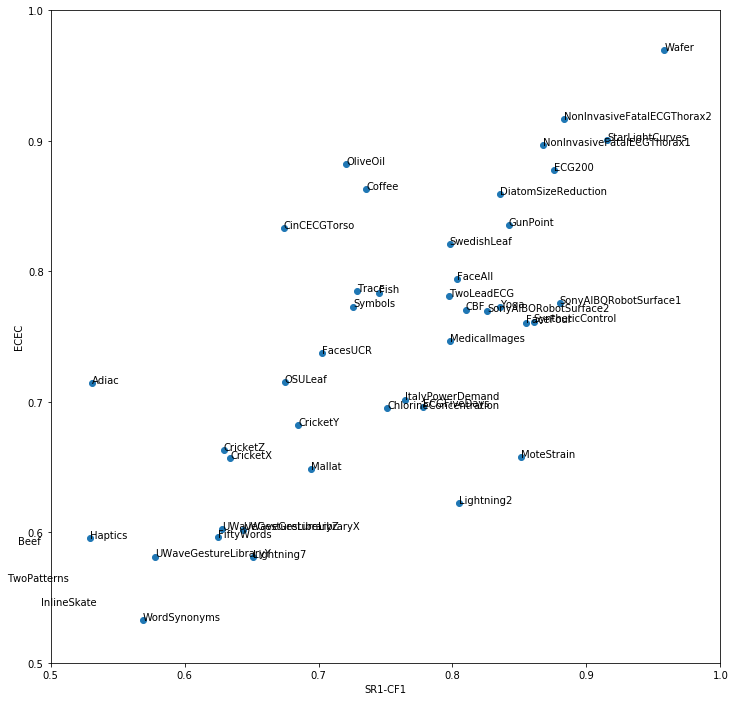

In [11]:
score
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(12,12))
ax.set_xlim(.5,1)
ax.set_ylim(.5,1)
ax.set_xlabel("SR1-CF1")
ax.set_ylabel("ECEC")
ax.scatter(x=score["SR1-CF1"],y=score["ECEC"])
for i in range(len(score["SR1-CF1"])):
    ax.text(score.iloc[i]["SR1-CF1"],score.iloc[i]["ECEC"],score.index[i])

In [12]:
earliness

,ECTS,EDSC,RelClass,ECDIRE,SR1-CF1,ECEC,ELECTS
Dataset,,,,,,,
FiftyWords,0.7296,0.5889,0.9220,0.4030,0.3702,0.4779,NaN
Adiac,0.5909,0.8455,0.9604,0.3854,0.5384,0.3018,0.000948
Beef,0.7650,0.9361,0.2570,0.4778,0.5783,0.6886,NaN
CBF,0.7150,0.3185,0.2308,0.2855,0.2704,0.4085,NaN
ChlorineConcentration,0.6607,0.3333,0.9759,0.1442,0.0771,0.2801,NaN
CinCECGTorso,0.5800,0.4363,0.5658,0.4971,0.4617,0.2235,NaN
Coffee,0.8394,0.5426,0.3844,0.8214,0.4589,0.2038,NaN
CricketX,0.7180,0.5257,0.7868,0.4798,0.3017,0.4066,NaN
CricketY,0.6649,0.4510,0.8236,0.3600,0.2906,0.4362,NaN


In [13]:
accuracy

,ECTS,EDSC,RelClass,ECDIRE,SR1-CF1,ECEC,ELECTS
Dataset,,,,,,,
FiftyWords,0.57,0.48,0.66,0.53,0.62,0.67,NaN
Adiac,0.40,0.16,0.63,0.55,0.60,0.73,0.040921
Beef,0.50,0.23,0.57,0.50,0.53,0.87,NaN
CBF,0.85,0.84,0.64,0.89,0.89,0.95,NaN
ChlorineConcentration,0.62,0.52,0.82,0.56,0.58,0.67,NaN
CinCECGTorso,0.87,0.55,0.85,0.81,0.81,0.89,NaN
Coffee,0.75,0.75,0.89,0.96,0.93,0.93,NaN
CricketX,0.56,0.52,0.61,0.57,0.57,0.72,NaN
CricketY,0.63,0.57,0.68,0.63,0.66,0.80,NaN
